# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [25]:
%matplotlib notebook

Magic Command <br>
http://ipython.readthedocs.io/en/stable/interactive/magics.html

<IPython.core.display.Javascript object>


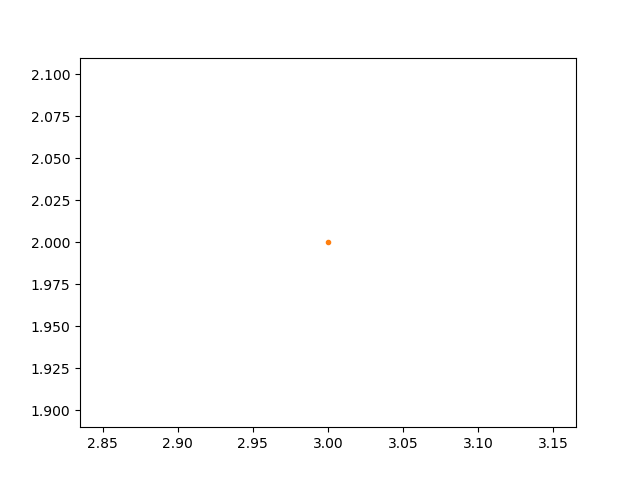

In [26]:
import matplotlib.pyplot as plt
plt.plot(3, 2)

In [27]:
plt.plot(3, 2, '.')

<IPython.core.display.Javascript object>


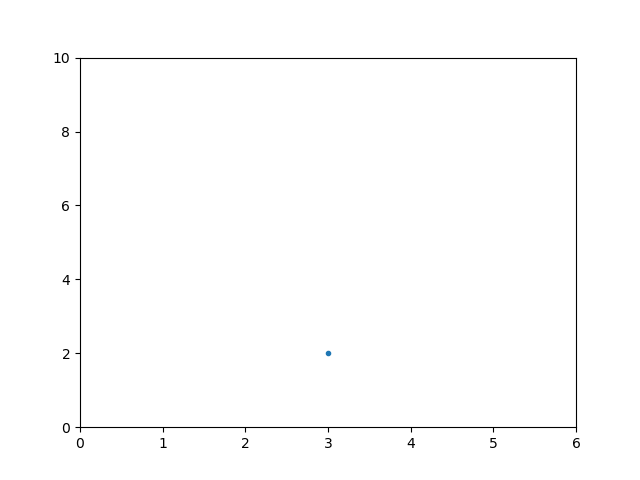

[0, 6, 0, 10]

In [28]:
# create a new figure
fig = plt.figure()
# add a subplot to the fig
ax = fig.add_subplot(111)
# plot the point (3,2)
ax.plot(3, 2, '.')
# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


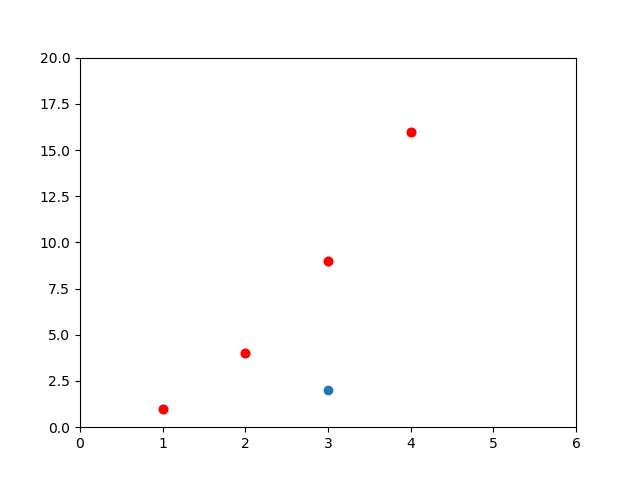

[0, 6, 0, 10]

In [30]:
# create a new figure
plt.figure()
# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')
# get the current axes
ax = plt.gca()
# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


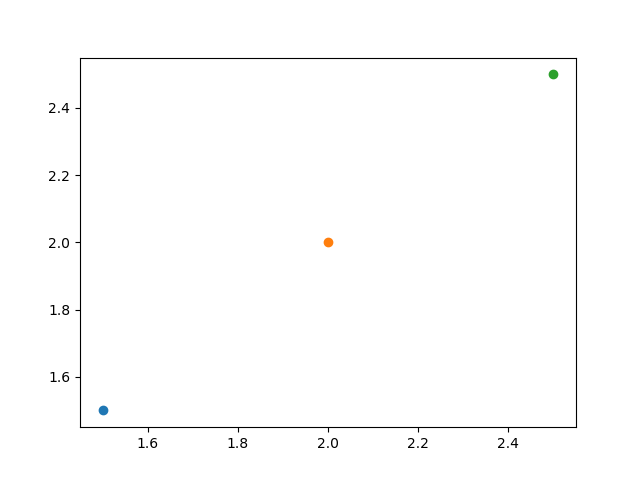

In [29]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

Try Different kinds of colours and point type <br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

# Exercise 1

Try to make a plot:
* with points (1,1), (2,4), (3,9), (4,16)
* with red and circle marker
* with x-axis limit (0,6) and y-axis limit (0,20)

<IPython.core.display.Javascript object>


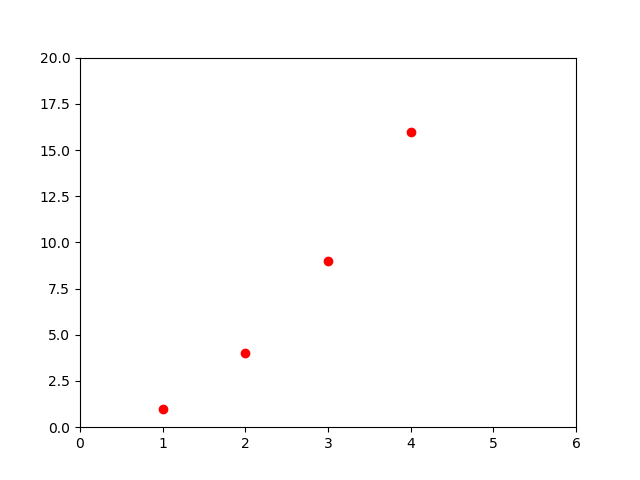

In [33]:
# ...

import matplotlib.pyplot as plt
plt.figure()
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

# Getting Data from Yahoo Finance

Previously we use pandas_datareader to get any data <br>
<br>
Help website of pandas_datareader library <br>
http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#google-finance <br>
<br>
Now we need to install fix-yahoo-finance as add-in <br>
https://pypi.org/project/fix-yahoo-finance/

In [34]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

# download dataframe
df_HSI = pdr.get_data_yahoo("^HSI", start="2018-01-01", end="2018-06-30")
df_5 = pdr.get_data_yahoo("0005.HK", start="2018-01-01", end="2018-06-30")

import pandas as pd
df = pd.merge(df_HSI, df_5, left_index=True, right_index=True, suffixes=['HSI','5'])

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2018-01-02 to 2018-06-29
Data columns (total 12 columns):
OpenHSI         121 non-null float64
HighHSI         121 non-null float64
LowHSI          121 non-null float64
CloseHSI        121 non-null float64
Adj CloseHSI    121 non-null float64
VolumeHSI       121 non-null int32
Open5           121 non-null float64
High5           121 non-null float64
Low5            121 non-null float64
Close5          121 non-null float64
Adj Close5      121 non-null float64
Volume5         121 non-null int32
dtypes: float64(10), int32(2)
memory usage: 16.3 KB


# Scatter Plots

<IPython.core.display.Javascript object>


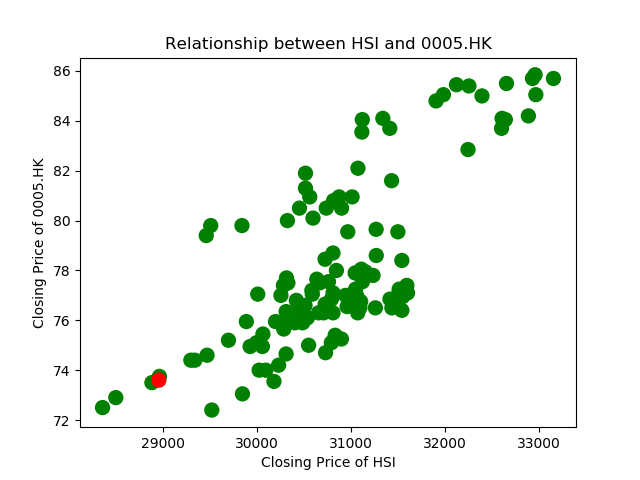

In [36]:
%matplotlib notebook

import numpy as np

x = df['CloseHSI']
y = df['Close5']

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', last one is 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# same as fig = plt.figure() ; ax = fig.add_subplot(111)

# plot the point with size 100 and chosen colors
ax.scatter(x, y, s=100, c=colors)

In [37]:
# add a label to the x axis
ax.set_xlabel('Closing Price of HSI')
# add a label to the y axis
ax.set_ylabel('Closing Price of 0005.HK')
# add a title
ax.set_title('Relationship between HSI and 0005.HK')

Text(0.5,1,'Relationship between HSI and 0005.HK')

<IPython.core.display.Javascript object>


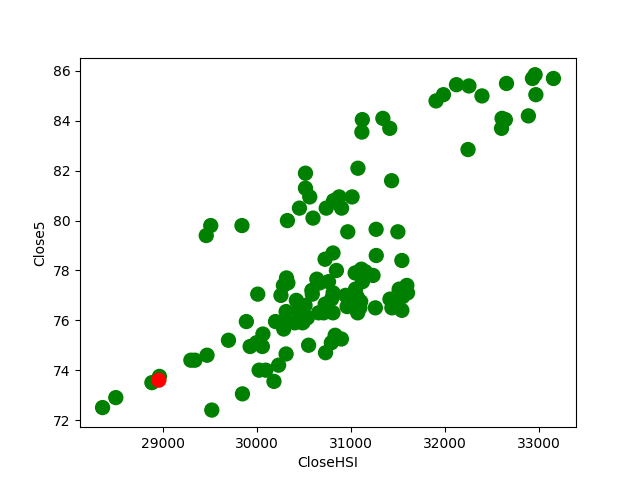

In [38]:
# Actually no need to do so difficult...
import pandas as pd
import matplotlib.pyplot as plt

ax = df.plot('CloseHSI', 'Close5', kind='scatter', s=100, c=colors)

# Line Plots

<IPython.core.display.Javascript object>


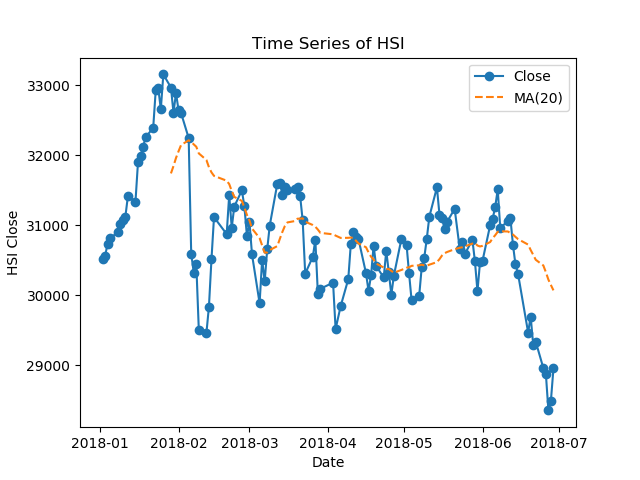

In [39]:
import numpy as np

HSIdate = df.index.values
HSIClose = df['CloseHSI']
HSI_MA20 = df['CloseHSI'].rolling(window=20).mean()

fig, ax = plt.subplots()
# plot the linear data and the exponential data
ax.plot(HSIdate, HSIClose, '-o', HSIdate, HSI_MA20, '--')

In [40]:
ax.set_xlabel('Date')
ax.set_ylabel('HSI Close')
ax.set_title('Time Series of HSI')

ax.legend(['Close', 'MA(20)'])

<IPython.core.display.Javascript object>


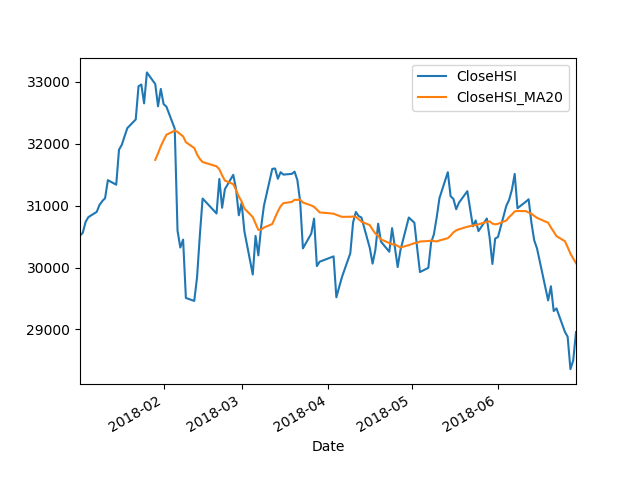

In [41]:
# Again, no need to do so difficult...
import pandas as pd
import matplotlib.pyplot as plt

df2 = df.copy()
df2['CloseHSI_MA20'] = df2['CloseHSI'].rolling(window=20).mean()
ax = df2.plot(y=['CloseHSI', 'CloseHSI_MA20'])

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

For further reference: <br>
https://pandas.pydata.org/pandas-docs/stable/visualization.html

# Bar Plots

<IPython.core.display.Javascript object>


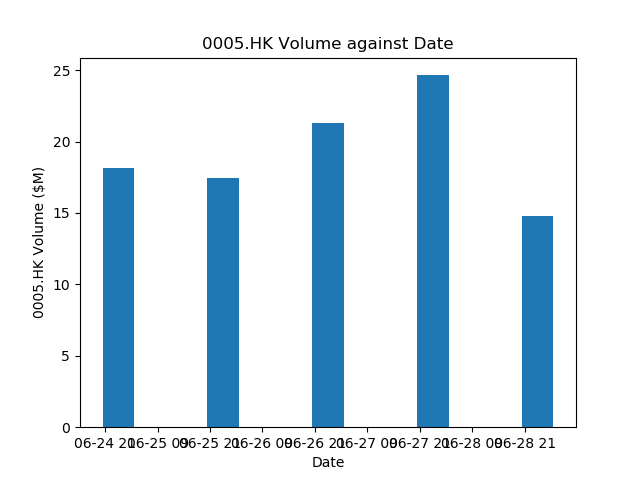

Text(0.5,1,'0005.HK Volume against Date')

In [42]:
df_tail = df.tail()

fig, ax = plt.subplots()
ax.bar(df_tail.index.values, df_tail['Volume5']/1e6, width = 0.3)

ax.set_xlabel('Date')
ax.set_ylabel('0005.HK Volume ($M)')
ax.set_title('0005.HK Volume against Date')

<IPython.core.display.Javascript object>


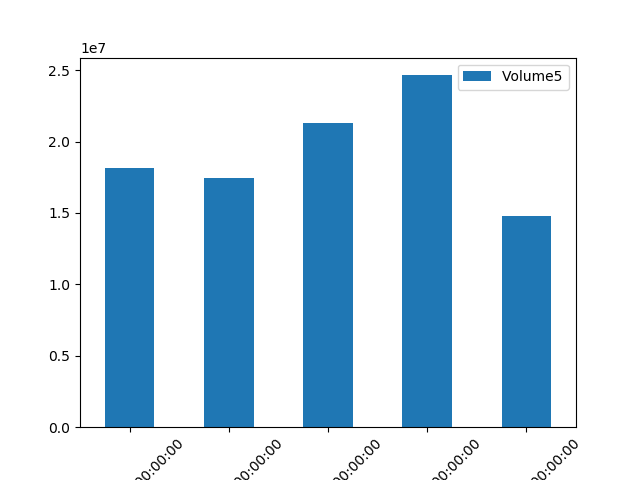

In [44]:
ax = df_tail.plot(y='Volume5', kind='bar')

In [46]:
# rotate the tick labels for the x axis
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(45)

More Reference: <br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

# Exercise 2

Try to plot the following information 0700.HK from 2018-07-01 to 2018-08-01:
* Daily Close
* MA(10) line
* Daily Volume

In [47]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

df_700 = pdr.get_data_yahoo("0700.HK", start="2018-07-01", end="2018-08-01")

Date700 = df_700.index.values
Close700 = df_700['Close']
MA10_700 = df_700['Close'].rolling(window=10).mean()
Volume700 = df_700['Volume']

[*********************100%***********************]  1 of 1 downloaded


<IPython.core.display.Javascript object>


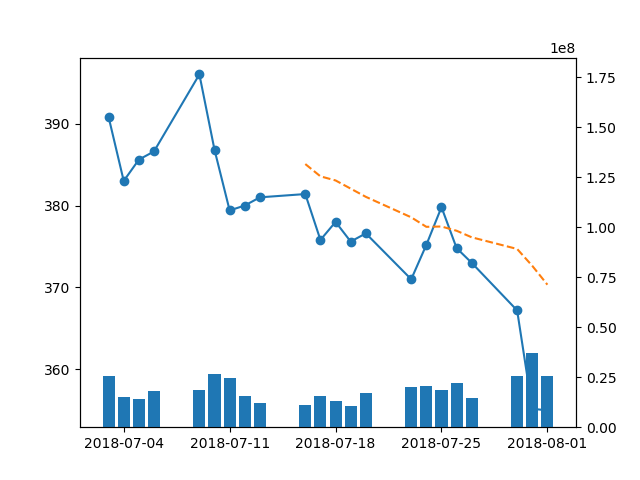

(0, 184893295)

In [48]:
import matplotlib.pyplot as plt
%matplotlib notebook
# ...
fig, ax = plt.subplots()
ax.plot(Date700, Close700, '-o', Date700, MA10_700, '--')
ax2 = ax.twinx()
ax2.bar(Date700, Volume700)
ax2.set_ylim(0, max(Volume700)*5)

# Histograms & Box Plots

In [49]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

# download dataframe
df_HSI = pdr.get_data_yahoo("^HSI", start="2018-01-01", end="2018-06-30")
df_5 = pdr.get_data_yahoo("0005.HK", start="2018-01-01", end="2018-06-30")

import pandas as pd
df = pd.merge(df_HSI, df_5, left_index=True, right_index=True, suffixes=['HSI','5'])

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


<IPython.core.display.Javascript object>


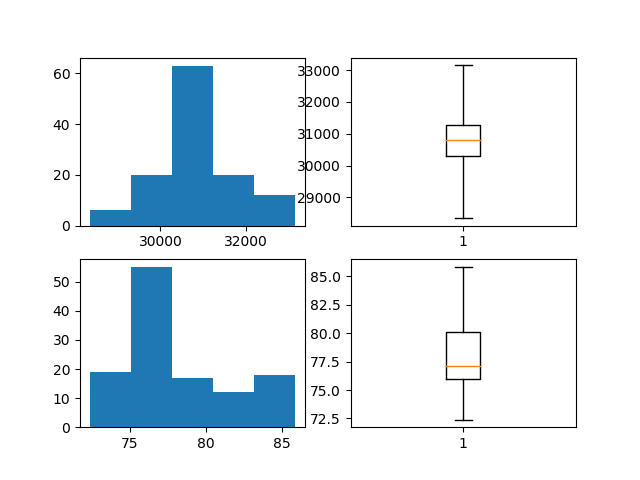

{'boxes': [<matplotlib.lines.Line2D at 0xebddf60>],
 'caps': [<matplotlib.lines.Line2D at 0xc350898>,
 'fliers': [<matplotlib.lines.Line2D at 0xc37d4a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc37d048>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc377ef0>,
  <matplotlib.lines.Line2D at 0xc350438>]}

In [59]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axs = [ax1,ax2,ax3,ax4]

axs[0].hist(df['CloseHSI'].values, bins=5)
axs[1].boxplot(df['CloseHSI'], whis='range')
axs[2].hist(df['Close5'].values, bins=5)
axs[3].boxplot(df['Close5'], whis='range')

<IPython.core.display.Javascript object>


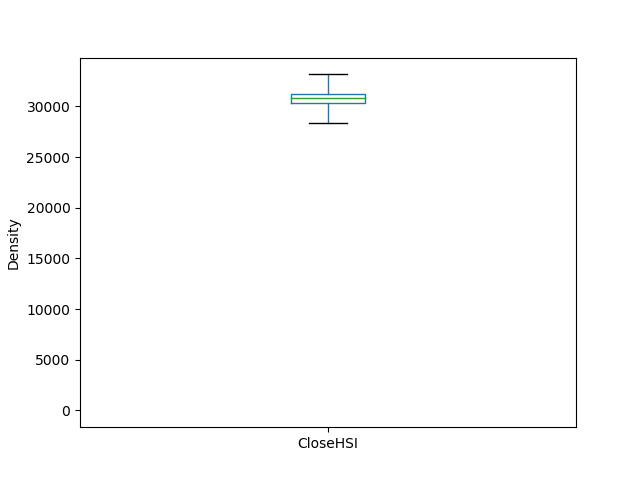

In [63]:
plt.figure()
# df['CloseHSI'].plot.hist()
df['CloseHSI'].plot.box(whis='range')

<IPython.core.display.Javascript object>


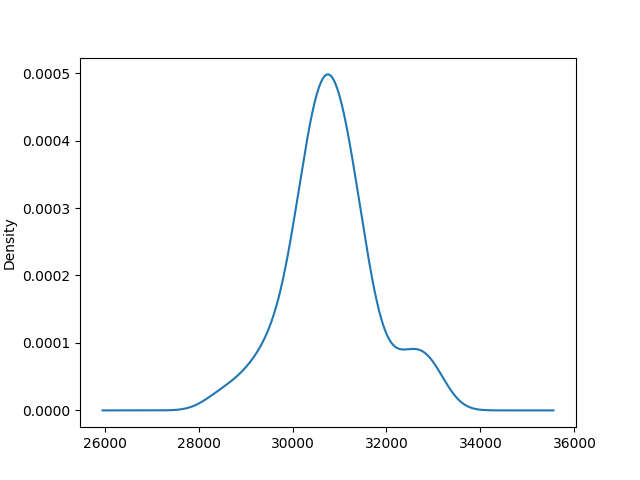

In [67]:
plt.figure()
df['CloseHSI'].plot.kde()

# Heatmaps

<IPython.core.display.Javascript object>


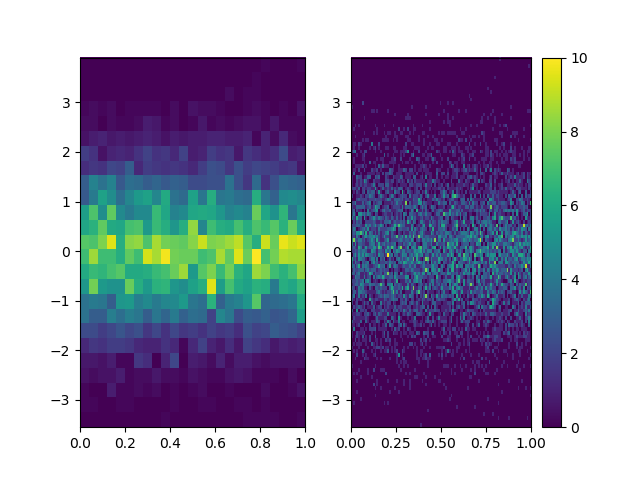

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2)

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
h1 = ax1.hist2d(X, Y, bins=25)

In [69]:
h2 = ax2.hist2d(X, Y, bins=100)
# this object: counts, xedges, yedges, im

In [70]:
plt.colorbar(h2[3], ax=ax2)

# Exercise 3

Try to transform daily % change of HSI and 0005.HK, i.e., (Close.shift(1) - Close) / prices <br>
and create plots:
* Histograms
* Boxplots
* Heat map between their returns

In [79]:
# ...

df['R_HSI'] = (df['CloseHSI'] - df['CloseHSI'].shift(1))/df['CloseHSI'].shift(1)
df['R_5'] = (df['Close5'] - df['Close5'].shift(1))/df['Close5'].shift(1)

<IPython.core.display.Javascript object>


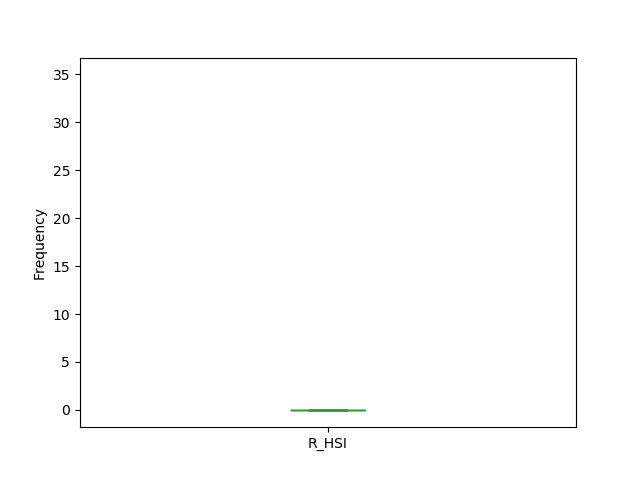

In [91]:
plt.figure()
df['R_HSI'].dropna().plot.hist()

<IPython.core.display.Javascript object>


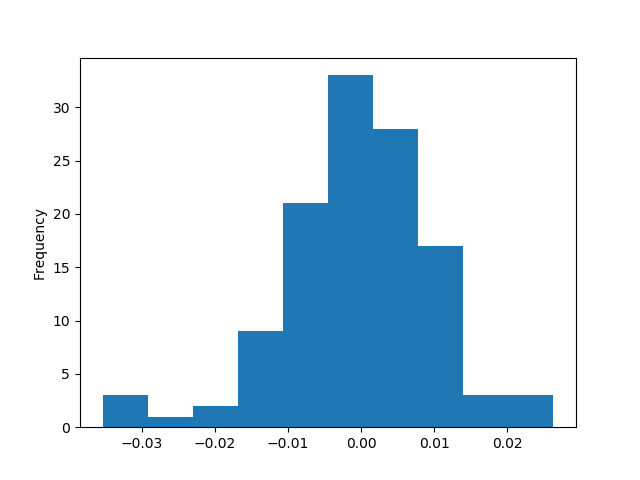

In [94]:
plt.figure()
df['R_5'].dropna().plot.hist()

<IPython.core.display.Javascript object>


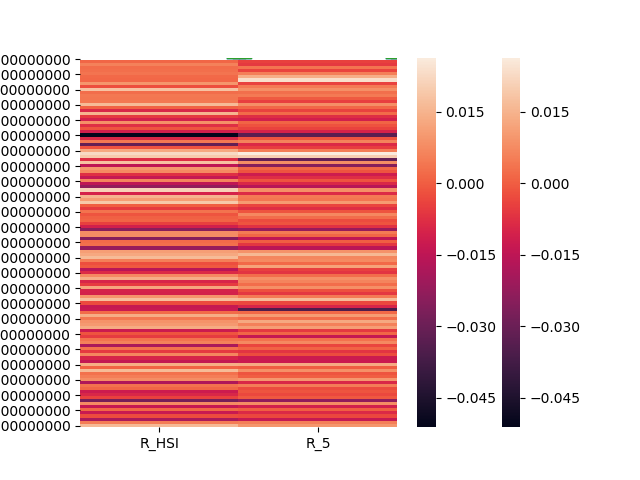

In [98]:
df[ ['R_HSI', 'R_5'] ].dropna().plot.box(whis='range')

<IPython.core.display.Javascript object>


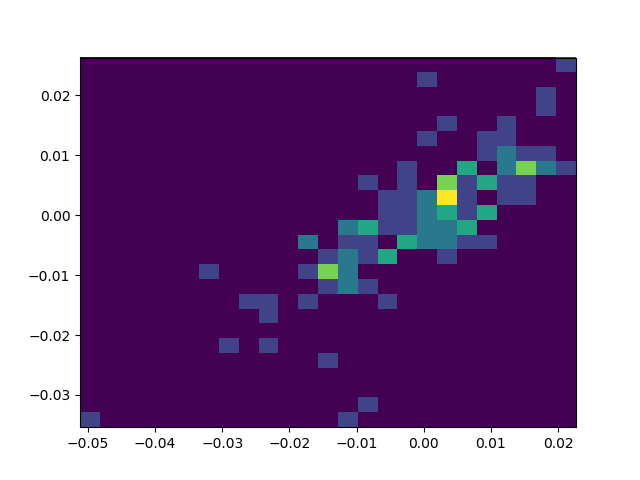

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [106]:
fig, ax = plt.subplots()
ax.hist2d(df['R_HSI'].dropna(), df['R_5'].dropna(), bins=25)

# Seaborn
Feel like ggplot in R <br>
https://seaborn.pydata.org/index.html

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

<IPython.core.display.Javascript object>


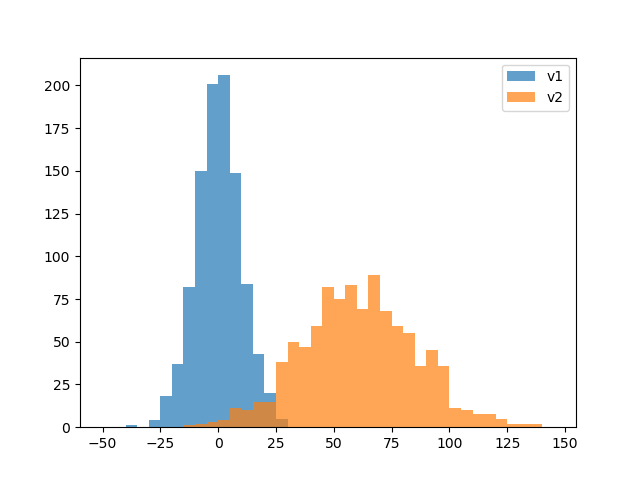

In [108]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

kdeplot

<IPython.core.display.Javascript object>


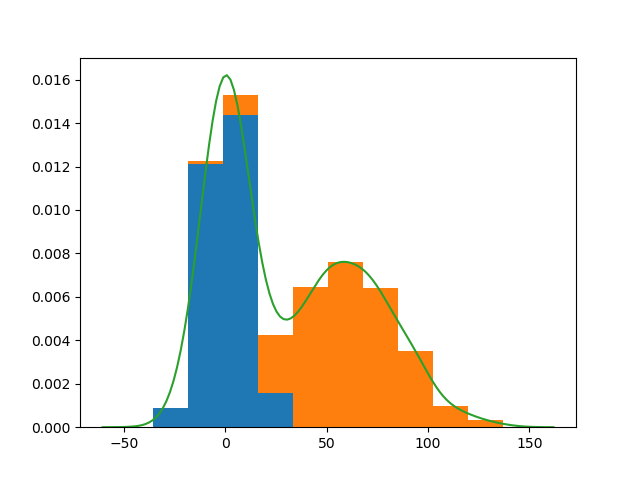

In [109]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

jointplot

<IPython.core.display.Javascript object>


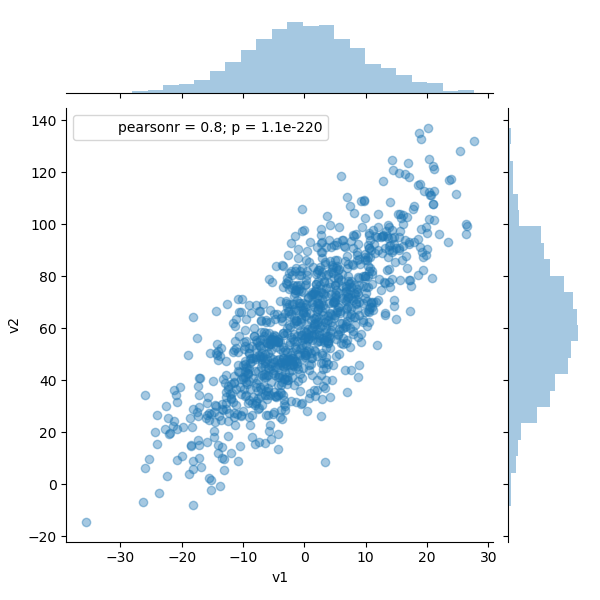

In [110]:
sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


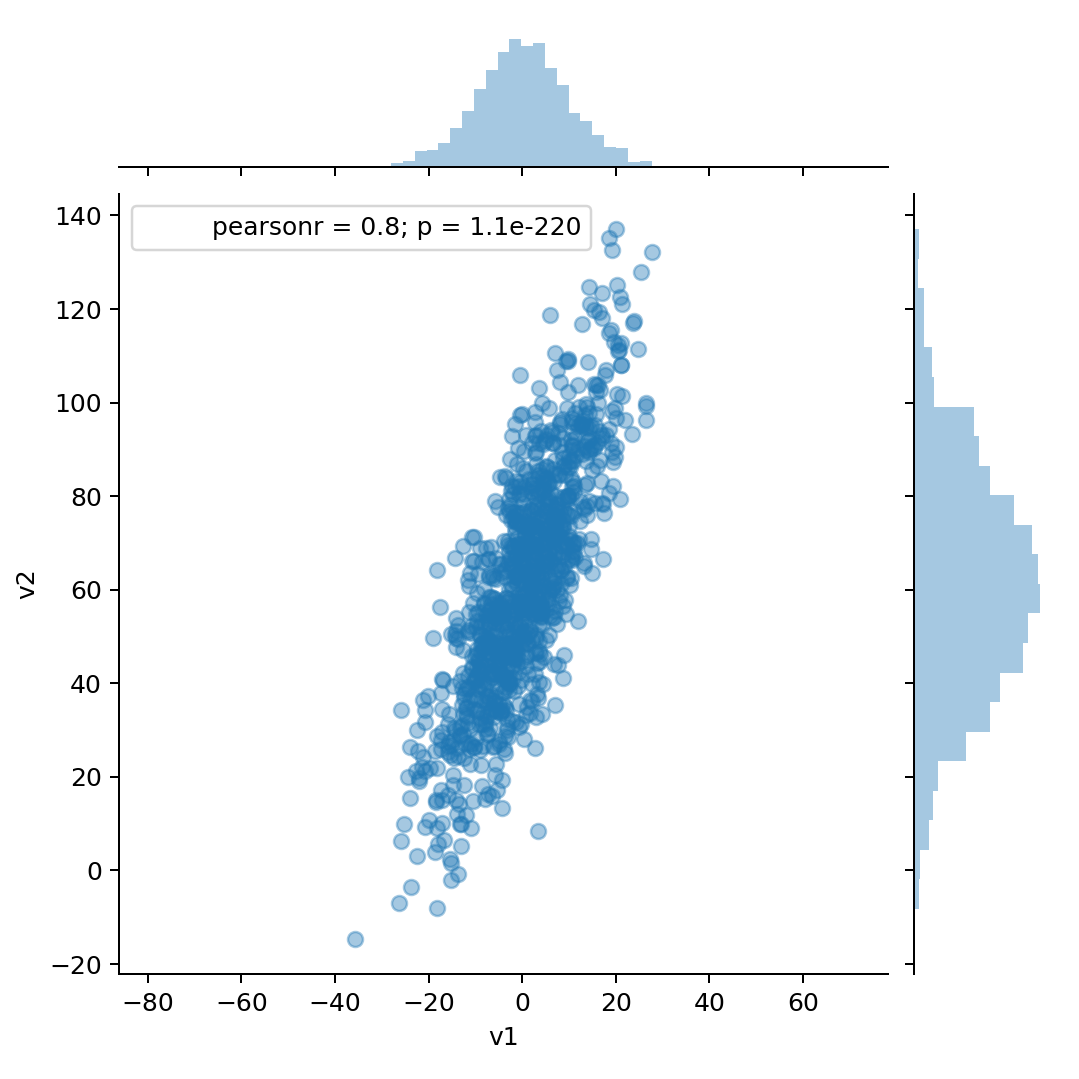

In [10]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

# Exercise 4

Ref: https://seaborn.pydata.org/generated/seaborn.jointplot.html <br>
Repeat the above example and try kind = 'hex' or 'reg' or 'kde'

<IPython.core.display.Javascript object>


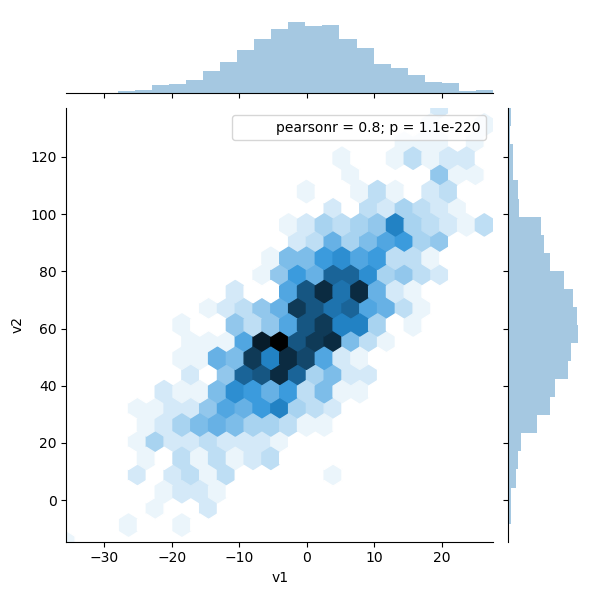

<IPython.core.display.Javascript object>


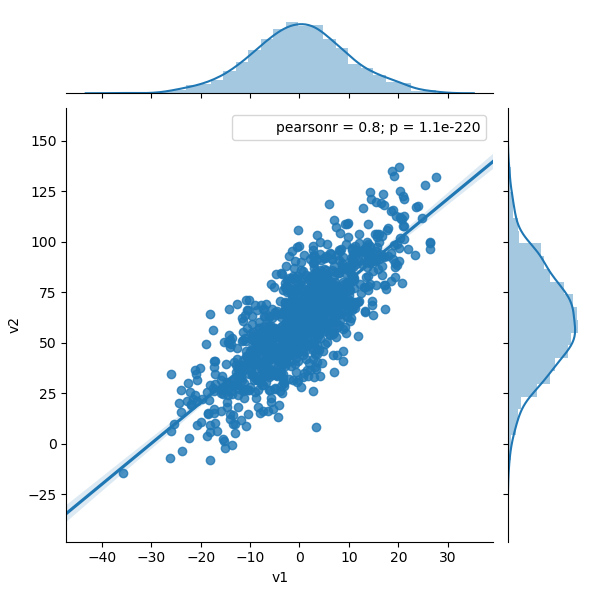

<IPython.core.display.Javascript object>


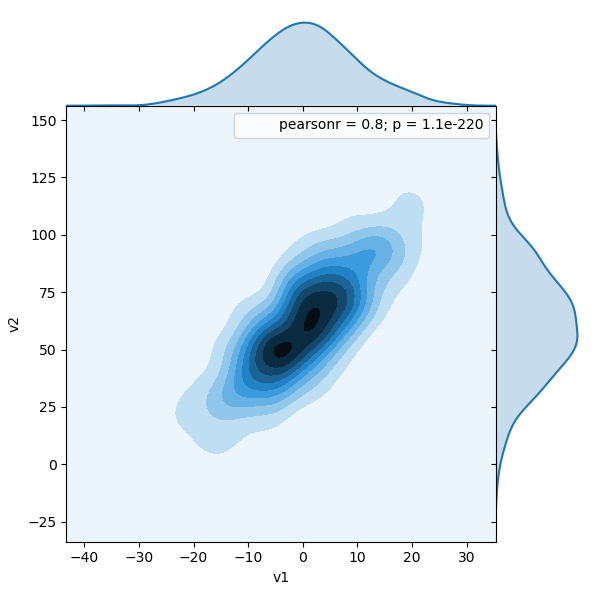

In [111]:
# ...

sns.jointplot(v1, v2, kind='hex');
sns.jointplot(v1, v2, kind='reg');
sns.jointplot(v1, v2, kind='kde', space=0);